In [1]:
import numpy as np
import pandas as pd
df = pd.DataFrame( { 'A': [1, np. nan, 3, 4, 5], 'B': [6, 7, 8, np. nan, 10], 'C': [11, 12, 13, 14, 15] } )
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [2]:
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [3]:
df.dropna()

,A,B,C
0,1.0,6.0,11
2,3.0,8.0,13
4,5.0,10.0,15


In [4]:
df.fillna(0)

,A,B,C
0,1.0,6.0,11
1,0.0,7.0,12
2,3.0,8.0,13
3,4.0,0.0,14
4,5.0,10.0,15


In [5]:
# Imputer was deplicated in 0.20
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean') # median, most_frequent
imp.fit(df)
imp.transform(df) # return as array

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

In [6]:
# ラベル化
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame( { 
    'A': [1, 2, 3, 4, 5], 
    'B': ["fuga", "fuga", "hoge", "fuga", "hoge"] } )
le = LabelEncoder()
le.fit(df['B'])
le.classes_

array(['fuga', 'hoge'], dtype=object)

In [7]:
le.transform(df['B'])

array([0, 0, 1, 0, 1])

In [8]:
# Z変換
from sklearn.preprocessing import StandardScaler # MinMaxScaler
stdsc = StandardScaler()
df = pd.DataFrame({
    'A' : [1, 2, 3, 4, 5],
    'B' : [100, 300, 1500, 400, 200]
})
stdsc.fit_transform(df)

array([[-1.41421356, -0.78446454],
       [-0.70710678, -0.39223227],
       [ 0.        ,  1.96116135],
       [ 0.70710678, -0.19611614],
       [ 1.41421356, -0.58834841]])

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
x, y = iris.data, iris.target
x.shape

(150, 4)

In [10]:
# 学習データとテストデータの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape

(105, 4)

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree, 
    filled = True,
    rounded = True,
    class_names = ["Setosa", "Versicolor", "Virginica"],
    feature_names = ["Sepal length", "Sepal width", "Petal length", "Petal width"],
    out_file = None
)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [13]:
y_pred = tree.predict(x_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [14]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        18\n           1       0.88      1.00      0.94        15\n           2       1.00      0.83      0.91        12\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.94      0.95        45\nweighted avg       0.96      0.96      0.95        45\n'

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
y_pred = forest.predict(x_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

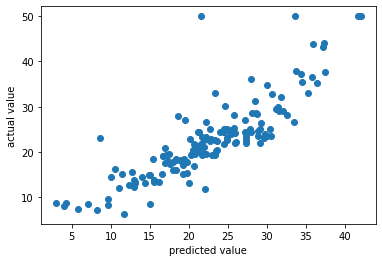

In [18]:
import matplotlib.pyplot as plt
y_pred = lr.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

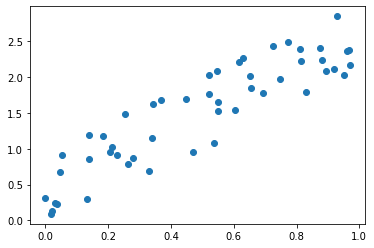

In [19]:
# PCA
x = np.random.rand(50)
y = x * 2 + np.random.rand(50)
fig, ax = plt.subplots()
ax.scatter(x, y)

(-1.0, 1.0)

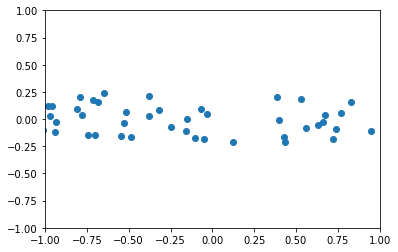

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
xy = np.hstack((x[:, np.newaxis], y[:, np.newaxis]))
x_pca = pca.fit_transform(xy)
fig, ax = plt.subplots()
ax.scatter(x_pca[:, 0], x_pca[:, 1])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)